# Odesolve Report
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Euler Method
---

In [2]:
def euler(f, x, t, h):
    return x+f(x,t)*h

### RK4
---

In [3]:
def rk4(f, x, t, h):
    k1 = f(x,t)
    k2 = f(x+k1*h/2, t+h/2)
    k3 = f(x+k2*h/2, t+h/2)
    k4 = f(x+k3*h, t+h )
    return x+(k1+2*k2+2*k3+k4)*h/6

### Solveto
---

In [4]:
def solveto(f, x1, t1, t2, hmax, method=euler):
    D=t2-t1                                    # distance between t1 and t2
    A =D//hmax; B=round(D%hmax,10)             # A:Steps   B:Final step size
    i=0
    C=method
    if C==euler and D!=0:
        while i < A:
            i=i+1
            t2=t1+hmax
            x2=euler(f,x1,t1,hmax)
            t1=t2
            x1=x2 
            if B > 0 and i==A:
                x2=euler(f,x1,t1,B)
        return x2
    if C==rk4 and D!=0:
        while i < A:
            i=i+1
            t2=t1+hmax
            x2 =rk4(f,x1,t1,hmax)
            t1=t2
            x1=x2
            if B > 0 and i==A:
                x2=rk4(f,x1,t1,B)
        return x2
    if D==0:                              # when t2=t1, x2=1.
        x2=1.
        return x2

In this function, I use the **while loop** and call **function euler()** and **function rk4()** to realize the iteration of x2. 
Moreover, I create a **variable 'C'** to distinguish when to use euler or rk4 method.

### Odesolve
---

In [5]:
def odesolve(f, X0, t, hmax, method=euler):
    C=method
    i=0
    t1=np.array(t); A=(t[-1]-t[0])/t[1]+1   # A=times to plot the solution
    x1=X0[0]
    list=[]
    if C==euler:
        while i < A :
            x2=solveto(f,x1,t1[i],t[-1],hmax,euler)
            i=i+1
            list.insert(0,x2)         # record every result of x2 in a list
        a=np.array(list)
        x_2=np.mat(a)                 # turn x_2 into the matrix form
        return x_2
            
        
    if C==rk4:
        while i < A:
            x2=solveto(f,x1,t1[i],t[-1],hmax,rk4)
            i=i+1
            list.insert(0,x2)
        a=np.array(list)
        x_2=np.mat(a)
        return x_2

In this function, **variable 'list'** is created to record and save every result of x2 in a list to be able to get many different values of x_2 for different t.

### Odesolve Plot
---

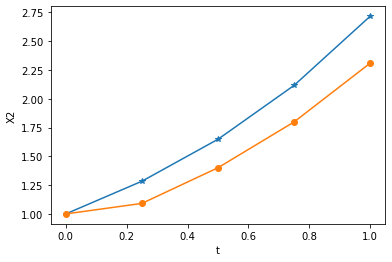

In [6]:
def f(x,t):
    return x
x0 = [1]
y0 = [0.85]
tvals = np.linspace(0,1,5)
Xt=odesolve(f,x0,tvals,0.001,euler)
Yt=odesolve(f,y0,tvals,0.001,euler)
plt.plot(tvals,Xt.T,marker='*')
plt.plot(tvals,Yt.T,marker='o')
plt.xlabel('t')
plt.ylabel('X2')
plt.show()

This function shows the plot of x2 for different t by calling the **odesolve function**.